In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import numpy as np
import os

%matplotlib inline


PROJECT_ROOT = Path.cwd().parent
print(f"Project Root: {PROJECT_ROOT}")

CSV_FILENAME = "training_log_big.csv"
CSV_PATH = PROJECT_ROOT / "stats" / CSV_FILENAME

OUTPUT_IMAGE_PATH = PROJECT_ROOT / "curves" / "big_curves_normalized.png"
OUTPUT_IMAGE_PATH.mkdir
print(OUTPUT_IMAGE_PATH)

Project Root: /zhome/d2/4/167803/Desktop/Deep_project/02456-final-project
/zhome/d2/4/167803/Desktop/Deep_project/02456-final-project/curves/big_curves_normalized.png


In [2]:
def normalize(series):
    """Normalizes a pandas Series to the range [0, 1]."""
    return (series - series.min()) / (series.max() - series.min())

def plot_curves(csv_path, output_path=None):
    if not csv_path.exists():
        print(f"CSV file not found at: {csv_path}")
        return

    print(f"Loading metrics from: {csv_path}")
    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"Error reading CSV: {e}")
        return

    if df.empty:
        print("CSV file is empty.")
        return

    # Extract Data
    epochs = df['Epoch']
    
    # --- NORMALIZATION ---
    # Normalize Training and Validation Loss to 0-1 range for easier comparison
    train_loss_norm = normalize(df['Train_Loss'])
    val_loss_norm = normalize(df['Val_Loss'])
    
    # mIoU is already a metric between 0 and 1, so we keep it raw
    val_iou = df['Val_mIoU']

    # --- PLOTTING ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # 1. Normalized Loss Curve
    ax1.plot(epochs, train_loss_norm, 'b-', label='Train Loss (Norm)')
    ax1.plot(epochs, val_loss_norm, 'r-', label='Val Loss (Norm)')
    ax1.set_title('Normalized Loss Curves (0-1)')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Normalized Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # 2. IoU Curve (Raw)
    ax2.plot(epochs, val_iou, 'g-', label='Validation mIoU')
    ax2.set_title('Validation Mean IoU')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('mIoU')
    ax2.set_ylim([0, 1.0]) # Fix y-axis to standard metric range
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    
    # Show plot in notebook
    plt.show()
    
    # Save to file if path provided
    if output_path:
        fig.savefig(output_path, dpi=300)
        print(f"Normalized plots saved to: {output_path}")

Loading metrics from: /zhome/d2/4/167803/Desktop/Deep_project/02456-final-project/stats/training_log_big.csv


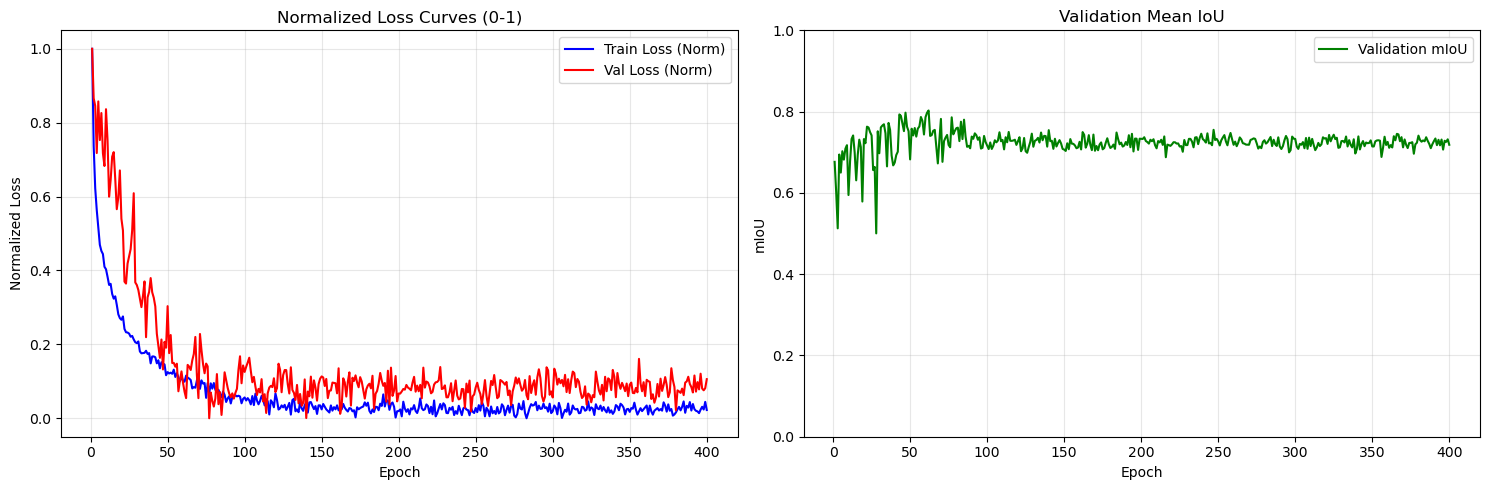

In [3]:
# Run the plotting function
plot_curves(CSV_PATH, _)